In [2]:
# Imports
from sys import path

path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.explainability.exp_utils import calculate_probas
from src.explainability.exp_utils import create_shap_explainer
from src.explainability.exp_utils import calculate_shap_values
import mlflow
import shap

In [3]:
#loading data

# 1. Charger les quatre fichiers CSV
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [4]:
indices = []
idxs = []
for j in range(4):
    for i in range (y_test.shape[0]):
        if (y_test.iloc[i, 0] == j):
            if(len(idxs) < 10):
                idxs.append(i)
            else:
                break
    indices = idxs + indices

print(indices)

[5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57]


In [5]:
model_path = "../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts" 

# Check available models
import glob
available_models = glob.glob("../mlruns/644848172247683146/models/*/artifacts/*.pkl")
print("Available models:")
for model in available_models:
    print(f" - {model}")

model = mlflow.sklearn.load_model(model_path)

print(f"\n Model loaded from: {model_path}")

Available models:
 - ../mlruns/644848172247683146/models\m-0b4c886fda504b2195d37fc2f6a0320d\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-257fda79e9cd477e8c77e0db1b0e092a\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-3edde4cb8ea14d5286fed1b7f467ba7c\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-6e1a5214164c474f91aceb60dfe823ce\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-92e214ac42614226a254a486aa5807f0\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-b0d1297d4f33430bb02bcec4e365c73f\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-b803db1ce5274bd6b2530463b25b42cf\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-e504c5635d5143df86a6c43e37d64fe9\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-f8510aeddd7d416b88b50e1b0dc20da4\artifacts\model.pkl

 Model loaded from: ../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts


In [6]:
X_test.head()

,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Age_Group,Continent
0,1,3.3,314.7,7.6,23.2,64,0,5.5,0,1,1,0,1,3
1,0,6.3,596.3,7.6,32.0,63,0,10.8,1,1,1,0,1,1
2,0,2.1,202.0,8.1,25.4,66,0,5.4,0,3,0,0,2,4
3,1,3.4,319.1,7.0,29.4,80,0,4.4,0,4,0,0,2,1
4,1,3.1,297.1,6.4,18.8,71,0,12.0,0,4,0,0,1,4


In [7]:
predict_fn = lambda X: calculate_probas(model, X)[1]

# 1. Création de l'explainer
explainer_shap = create_shap_explainer(
        predict_fn=predict_fn, 
        data=X_train 
    )

# 2. Calcul des valeurs SHAP
shap_values = calculate_shap_values(explainer_shap, X_test.iloc[indices])

PermutationExplainer explainer: 41it [00:40,  1.04s/it]                        


C:\Users\samim\AppData\Local\Temp\ipykernel_13616\3752890335.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


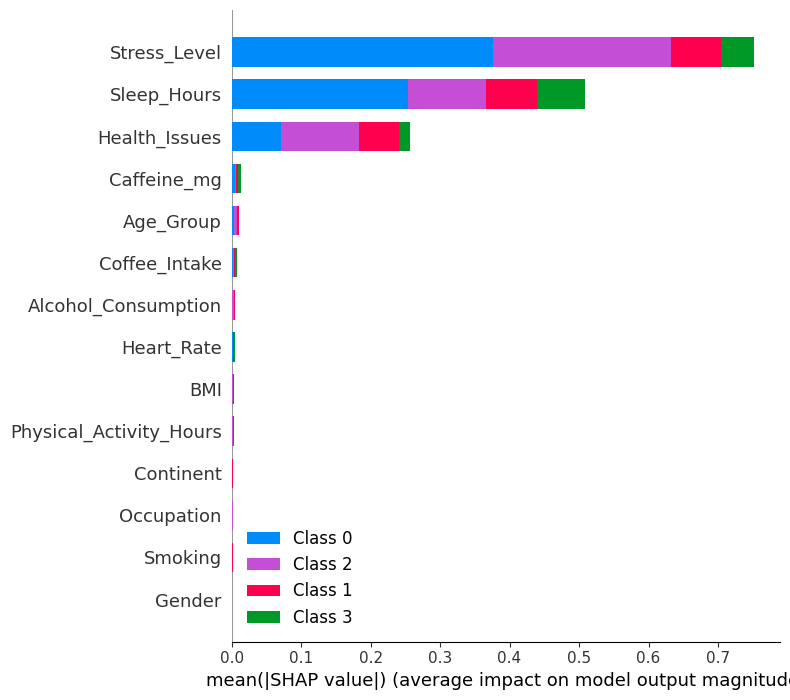

In [8]:

shap.summary_plot(
    shap_values, # On prend toutes les samples, toutes les features, pour la classe 2
    X_test.iloc[indices], 
    show=False # Pour éviter l'affichage dans certaines environnements
)

C:\Users\samim\AppData\Local\Temp\ipykernel_13616\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


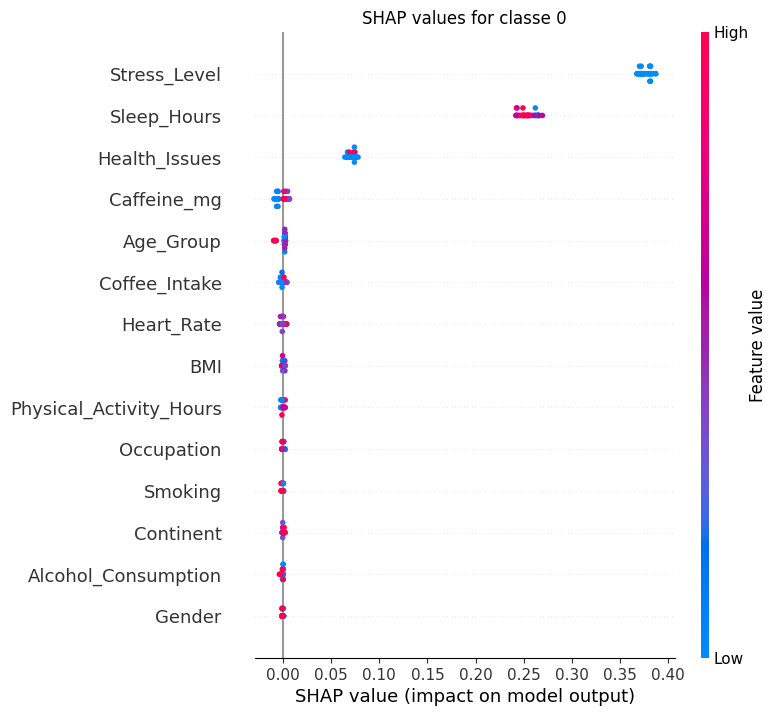

C:\Users\samim\AppData\Local\Temp\ipykernel_13616\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


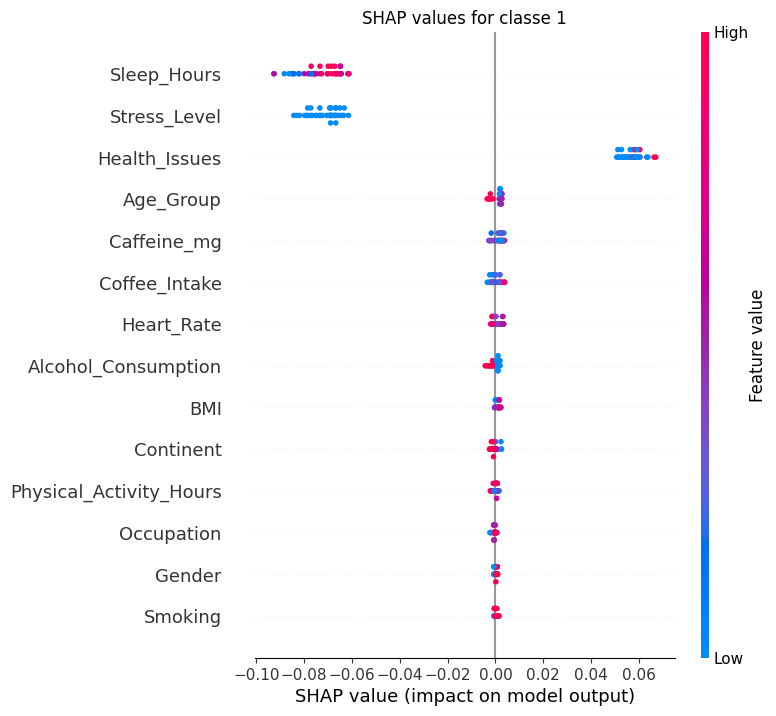

C:\Users\samim\AppData\Local\Temp\ipykernel_13616\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


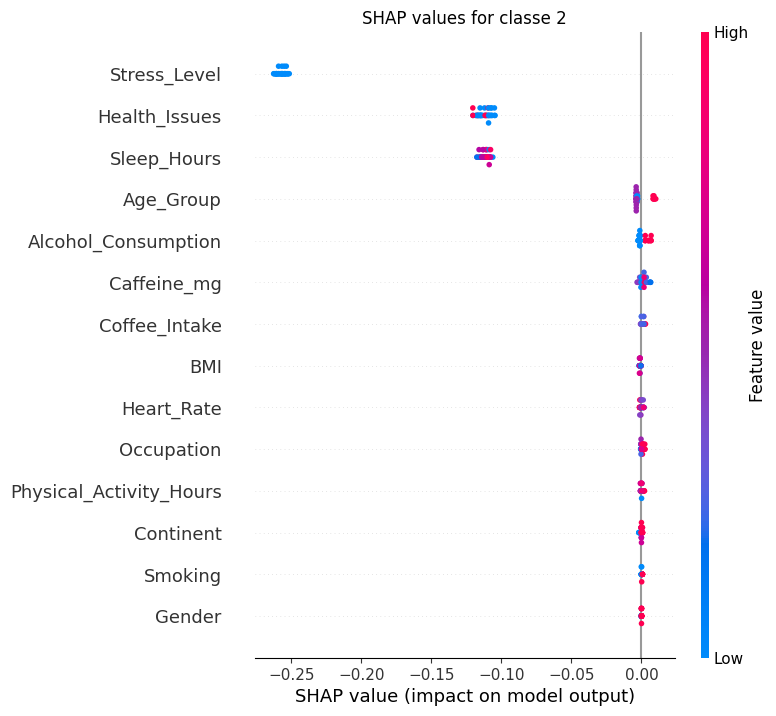

C:\Users\samim\AppData\Local\Temp\ipykernel_13616\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


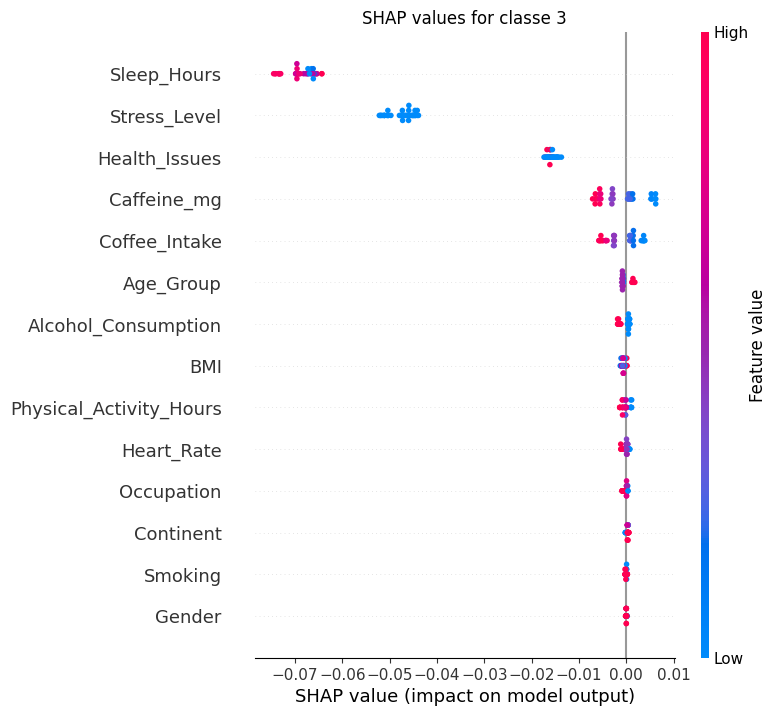

In [9]:

for i in range(4):
    # 1. Utilise shap.summary_plot sans l'argument 'title'
    shap.summary_plot(
        shap_values[:, :, i],
        X_test.iloc[indices],
        show=False # On empêche l'affichage immédiat
    )
    
    # 2. Ajoute le titre en utilisant Matplotlib
    plt.title(f"SHAP values for classe {i}")
    
    # 3. Affiche la figure
    plt.show()